# THE SPARKS FOUNDATION : GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP), SEPTEMBER 2023

# INTERNSHIP TASK 1 : Prediction using Supervised ML

## PROBLEM STATEMENT

Data Source : http://bit.ly/w-data

This is a Simple Regression problem with just 2 variables

Predict the percentage of a student based on the number of study hours.

What will be the predicted score if a student studies for 9.25 hrs/day ?

## SOLUTION

## AUTHOR : ARITRA BAG

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import gradio as gr

### IMPORTING DATASET

In [2]:
#Reading the dataset from the data source directly
#dataset=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

#Reading dataset from a .CSV file directly
dataset=pd.read_csv('linear_regression.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### EXPLORATORY DATA ANALYSIS

In [4]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe unique values in the hours column is given by :\n')
print(dataset['Hours'].unique())
print('\nThe unique values in the score column is given by :\n')
print(dataset['Scores'].unique())
print('\nThe correlation coefficient between Hours and Scores is : \n' + str(dataset.corr()) + '\n\n')


The number of null values in the dataset is : 
Hours     0
Scores    0
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

The data distribution in the columns is given by :

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

The unique values in the hours column is given by :

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]

The unique values in the score column is given by :

[2

### SPLITTING INTO THE X(HOURS) AND Y(SCORES) VALUES

We divide the data into "attributes" (inputs or X values) and "labels" (outputs or Y values).

In [5]:
hours = dataset.iloc[:,0].values.reshape(-1,1)
scores = dataset.iloc[:,1].values.reshape(-1,1)

In [6]:
hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
scores

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

### GRAPHICAL REPRESENTATION OF THE DATASET

This gives us a visual representation of the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

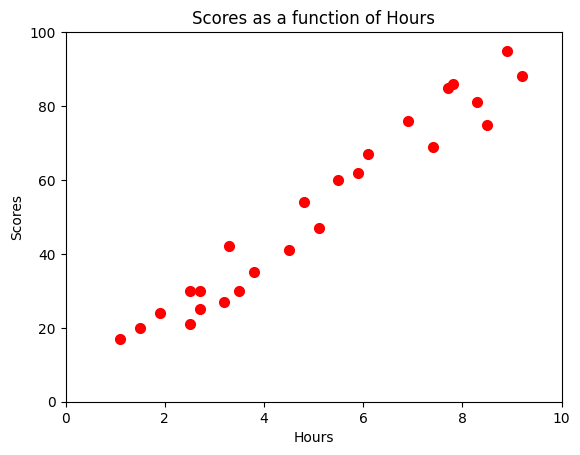

In [8]:
plt.scatter(hours, scores, marker = 'o', c='red', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.xlim([0,10])
plt.ylim([0,100])
plt.title('Scores as a function of Hours')
plt.show

Text(0.5, 1.0, 'Boxplot for Scores')

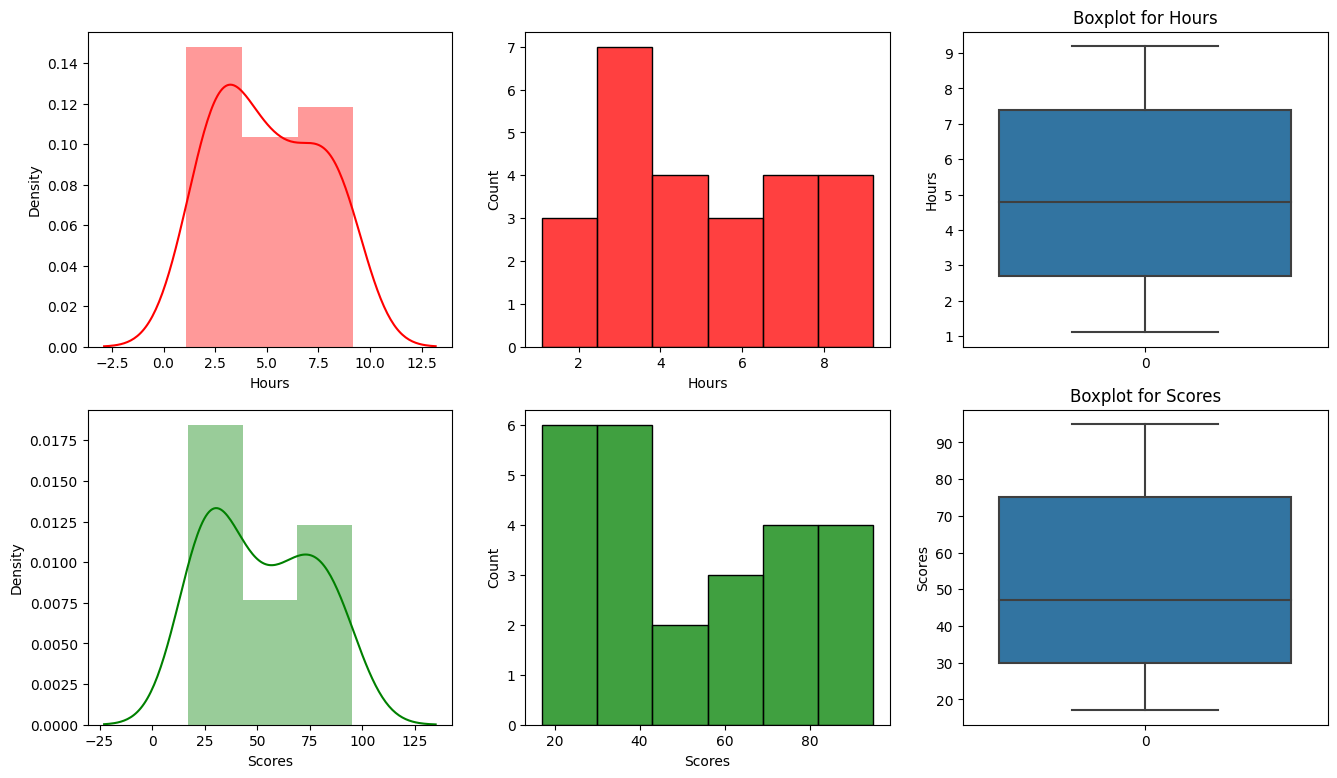

In [9]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (16,9))
plt.subplot(231)
sns.distplot(dataset['Hours'],color = 'red')
plt.subplot(232)
sns.histplot(dataset['Hours'],color = 'red')
plt.subplot(233)
sns.boxplot(dataset['Hours'])
plt.ylabel('Hours')
plt.title('Boxplot for Hours')
plt.subplot(234)
sns.distplot(dataset['Scores'],color = 'green')
plt.subplot(235)
sns.histplot(dataset['Scores'],color = 'green')
plt.subplot(236)
sns.boxplot(dataset['Scores'])
plt.ylabel('Scores')
plt.title('Boxplot for Scores')

### CREATING A FUNCTION FOR DATA PREPROCESSING LINEAR REGRESSION

We will use feature scaling on both the hours and scores sets to fix the data ranges (DATA PREPROCESSING). Standard Scaling was used here. 20% of the total dataset will be used for testing purposes.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
def linear_regressor(hours, scores):

    #Scaling the data with a Standard Scaler (Data Preprocessing)    
    hours_scaler = StandardScaler()
    scaled_hours = hours_scaler.fit_transform(hours)
    
    scores_scaler = StandardScaler()
    scaled_scores = scores_scaler.fit_transform(scores)

    #Splitting the Training and Test Set
    scaled_hours_train, scaled_hours_test, scaled_scores_train, scaled_scores_test = train_test_split (scaled_hours, scaled_scores, test_size = 0.2, random_state = 42, shuffle =True)

    #Training the data
    regressor = LinearRegression()
    regressor.fit(scaled_hours_train, scaled_scores_train)

    #Making predictions on the Test Set
    scaled_predicted_scores_test = regressor.predict(scaled_hours_test)

    #Inversing the Scaling
    hours_train = hours_scaler.inverse_transform(scaled_hours_train)
    hours_test = hours_scaler.inverse_transform(scaled_hours_test)

    scores_train = scores_scaler.inverse_transform(scaled_scores_train)
    scores_test = scores_scaler.inverse_transform(scaled_scores_test)

    predicted_scores_test = scores_scaler.inverse_transform(scaled_predicted_scores_test)

    return hours_scaler, scores_scaler, hours_train, scaled_hours_train, hours_test, scaled_hours_test, scores_train, scaled_scores_train, scores_test, scaled_scores_test, regressor, predicted_scores_test, scaled_predicted_scores_test

### CREATING A FUNCTION FOR PLOTTING

This gives us a visual representation of the Training Set, Test Set, Predicted Values and the Regression Model

In [12]:
def plotter(x_scaler, x_train, x_train_scaled, x_test, x_test_scaled, y_train, y_train_scaled, y_test, y_test_scaled, model, y_predicted, y_predicted_scaled):
    
    X = range(0,10)
    Y = range(0,100)

    plt.figure(figsize = (16,10))
    plt.tight_layout(pad = 3.0)

    plt.subplot(2, 1 ,1)
    plt.scatter(x_train_scaled, y_train_scaled, marker = 'o', c = 'None', edgecolors='red', linewidth=2, label = 'Scaled Training Set')
    plt.scatter(x_test_scaled, y_test_scaled, marker = 'o', c = 'None', edgecolors='blue', linewidth=2, label = 'Scaled Test Set')
    plt.scatter(x_test_scaled, y_predicted_scaled, marker = '^', c = 'None', edgecolors='green', linewidth=2, label = 'Predicted Test Set Values')
    
    regression_line = (model.coef_* x_scaler.transform(hours) + model.intercept_).reshape(-1,1)
    plt.plot (x_scaler.transform(hours), regression_line, c='black', linewidth=2, label =' Regression Model')

    plt.xlabel('Scaled Hours')
    plt.ylabel('Scaled Scores')
    plt.legend()
    plt.title('Scaled Scores as a function of Scaled Hours')

    plt.subplot(2, 1, 2)
    plt.scatter(x_train, y_train, marker = 'o', c = 'None', edgecolors='red', linewidth=2, label = 'Training Set')
    plt.scatter(x_test, y_test, marker = 'o', c = 'None', edgecolors='blue', linewidth=2, label = 'Test Set')
    plt.scatter(x_test, y_predicted, marker = '^', c = 'None', edgecolors='green', linewidth=2, label = 'Predicted Test Set Values')
    
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.xlim([0,10])
    plt.ylim([0,100])
    plt.legend()
    plt.title('Scores as a function of Hours')
    plt.show

    print('\nThe intercept of the linear regressor is : '+ str(model.intercept_))
    print('\nThe coefficient of the linear regressor is : '+ str(model.coef_))
    print('\nThe relationship between Scores and Hours is : Scaled Scores = '+ str(model.coef_)+' x Scaled Hours + ' + str(model.intercept_))


### CREATING A FUNCTION FOR EVALUATION

The final step is to mathematically evaluate the performance of algorithm. We will be using the Mean Absolute Error, Mean Squared Error and the R2 Score.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
def evaluation (x_test, y_test, y_predicted):

    predicted_values = np.array(np.round(y_predicted, 2)).tolist()
    df = pd.DataFrame({'Hours' : np.array(x_test).tolist(), 'Actual Scores': np.array(y_test).tolist() , 'Predicted Scores': predicted_values})  
    print ('\n')
    print(df)
    print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (y_test, y_predicted)))
    print('\nThe Mean Squared Error is : ' + str(mean_squared_error (y_test, y_predicted)))
    print('\nThe R2 Score is : ' + str(r2_score (y_test, y_predicted)))

### FINAL IMPLEMENTATION


The intercept of the linear regressor is : [-0.00510704]

The coefficient of the linear regressor is : [[0.96683146]]

The relationship between Scores and Hours is : Scaled Scores = [[0.96683146]] x Scaled Hours + [-0.00510704]


   Hours Actual Scores Predicted Scores
0  [8.3]        [81.0]          [83.19]
1  [2.5]        [30.0]          [27.03]
2  [2.5]        [21.0]          [27.03]
3  [6.9]        [76.0]          [69.63]
4  [5.9]        [62.0]          [59.95]

The Mean Absolute Error is : 3.9207511902099244

The Mean Squared Error is : 18.94321172231529

The R2 Score is : 0.9678055545167993


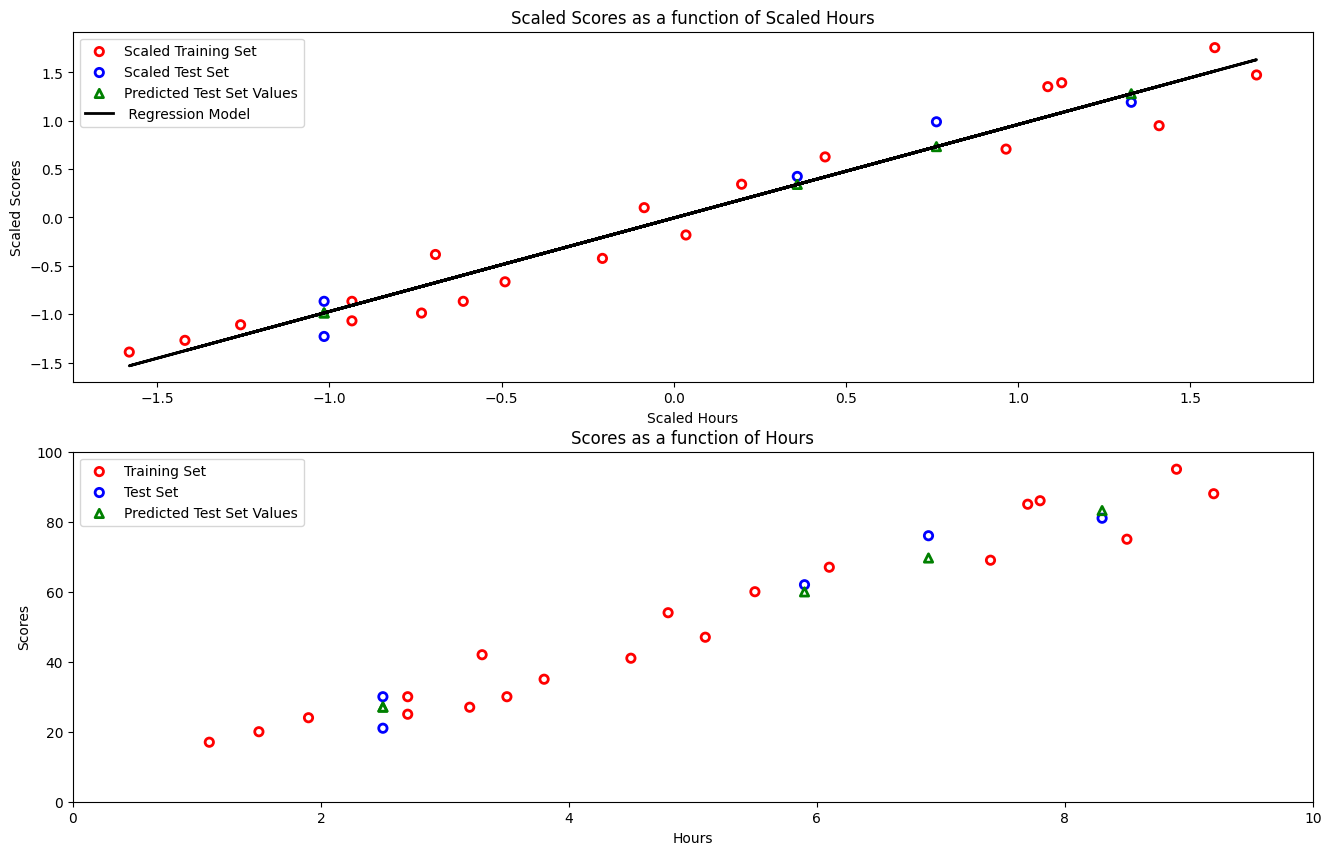

In [15]:
x_scaler, y_scaler, x_train, x_train_scaled, x_test, x_test_scaled, y_train, y_train_scaled, y_test, y_test_scaled, model, y_predicted, y_predicted_scaled = linear_regressor(hours, scores)
plotter(x_scaler, x_train, x_train_scaled, x_test, x_test_scaled, y_train, y_train_scaled, y_test, y_test_scaled, model, y_predicted, y_predicted_scaled)
evaluation (x_test, y_test, y_predicted)

### SAVING THE MODEL

In [16]:
import pickle
pickle.dump(model, open('/home/aritrabag/Documents/internship_projects/TSF/linear_regression/linear_regressor','wb'))

### CREATING A GRADIO BASED UI FOR THE REGRESSION MODEL

In [17]:
def score_predictor(hours):
    float_hours = float(hours)
    scaled_float_hours = x_scaler.transform([[float_hours]])
    scaled_float_score = model.predict(scaled_float_hours)
    float_score = y_scaler.inverse_transform(scaled_float_score)
    score = np.array2string(float_score, precision = 2)
    score = score.replace('[[','')
    score = score.replace(']]','')
    return score

with gr.Blocks() as Score_Predictor:
    hours = gr.Textbox(label = "Hours Studied per Day")
    output = gr.Textbox(label =" Possible Score (Percentage) ")
    calculate_btn = gr.Button("Predict")
    calculate_btn.click(fn = score_predictor, inputs = hours, outputs=output, api_name="score_predictor")
    
Score_Predictor.launch()   

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


#### A Student studying 9.25 hrs/day will get a 92.39 Percentage